# Расчетно-графическая работа
### Криволинейные координаты. Метрический Тензор. Тензорный анализ
- Выполнил: **Савчук Д.И.**
- Вариант: **20**
- Группа: **М8О-103М-20**
- Преподаватель: **Медведев С.В., Поповкин А.В.**
- Дата сдачи: **tbd**
___
**Москва, 2020**

### Постановка задачи
Заданы преобразование координат на плоскости ($x$, $y$ - декартовы координаты, $x^1$, $x^2$ - криволинейные координаты) и компоненты вектора скорости в декартовых координатах.
$$x = x^1 + (x^2)^3, y = x^2; \nu_x = 3y^2, \nu_y = 1$$

### Решение
Импорт нужных для работы программы модулей

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
from sympy.interactive import printing
from matplotlib import pyplot as plt
printing.init_printing(use_latex=True)

x, y, z, t = sp.symbols('x y z t')
X, Y, Z = sp.symbols('X Y Z')
vx, vy, c = sp.symbols('vx vy c')

Введение заданных параметров, где $X = x^1, Y = x^2$:

In [2]:
xx = X + Y**3 #X + sp.sin(Y)
yy = Y
v_x = 3 * y**2
v_y = 1

1. 	Указать область плоскости, в которой преобразование координат взаимнооднозначно.<br>
Взаимная однозначность декартовых координат через криволинейные на $\mathbb{R}x\mathbb{R}$.

In [3]:
q = {x: xx, y: yy}
v = {vx: v_x, vy: v_y}

eq1 = sp.Eq(x, q[x])
eq2 = sp.Eq(y, q[y])

display(eq1, eq2)

Криволинейные через декартовые координаты

In [4]:
Q = sp.solve([eq1, eq2], [X, Y])

eQ1 = sp.Eq(X, Q[0][0])
eQ2 = sp.Eq(Y, Q[0][1])

display(eQ1, eQ2)

2. Построить координатную сетку на плоскости

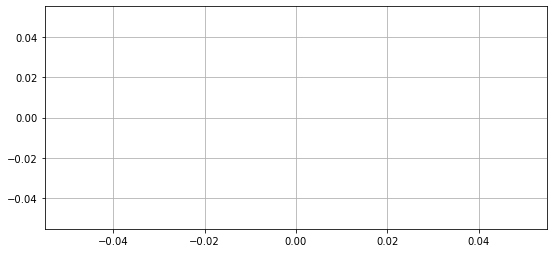

In [5]:
plt.figure(figsize=(9, 9))
plt.subplot(211)
plt.plot(0, 0, color='black')
plt.grid()

3. Найти векторы основного и взаимного базисов. Изобразить их в какой-либо точке координатной сетки в каждом квадранте.<br>
Основной базис:<br>
$$\overrightarrow{э_i} = \frac{\overrightarrow{dr}}{dx^i}$$

In [6]:
э1 = [sp.diff(q[x], X), sp.diff(q[y], X)]
э2 = [sp.diff(q[x], Y), sp.diff(q[y], Y)]

print('Векторы основного базиса:')
display(э1, э2)

Векторы основного базиса:


Построение векторных полей

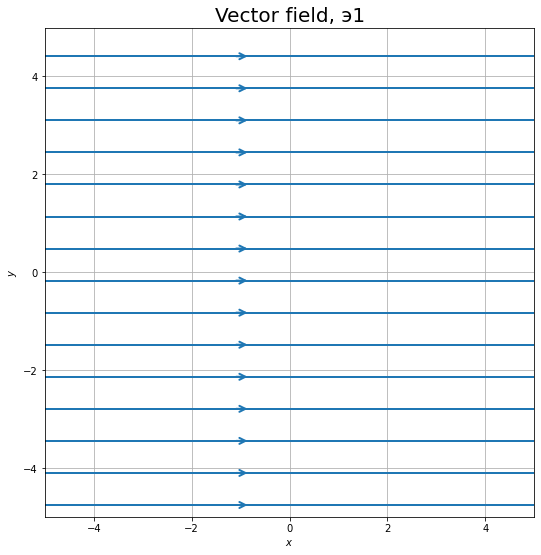

In [7]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

x_shape = grid_x.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = э1[0].subs([(Y, i), (X, j)])
        V[i,j] = э1[1].subs([(Y, i), (X, j)])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#q = ax.quiver(grid_x, grid_y, U, V, units='xy' ,scale=2, color='black')
q = ax.streamplot(grid_x, grid_y, U, V, linewidth=2, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1.5)

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Vector field, э1', fontsize=20)
plt.grid()
plt.show()

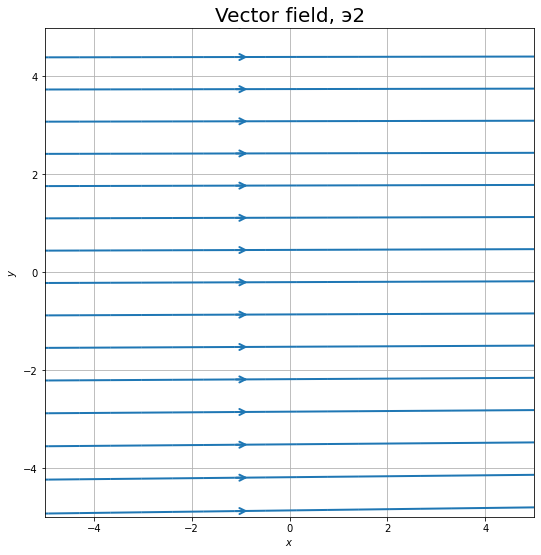

In [8]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

x_shape = grid_x.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = э2[0].subs([(Y, i), (X, j)])
        V[i,j] = э2[1].subs([(Y, i), (X, j)])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#q = ax.quiver(grid_x, grid_y, U, V, units='xy' ,scale=2, color='black')
q = ax.streamplot(grid_x, grid_y, U, V, linewidth=2, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1.5)

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Vector field, э2',fontsize=20)
plt.grid()
plt.show()

Взаимный базис:<br>
$$\overrightarrow{э^i} = grad(x^i)$$

In [9]:
Э1 = [sp.diff(Q[0][0], x), sp.diff(Q[0][0], y)]
Э2 = [sp.diff(Q[0][1], x), sp.diff(Q[0][1], y)]

print('Векторы взаимного базиса:')
display(Э1, Э2)

Векторы взаимного базиса:


Построение векторных полей

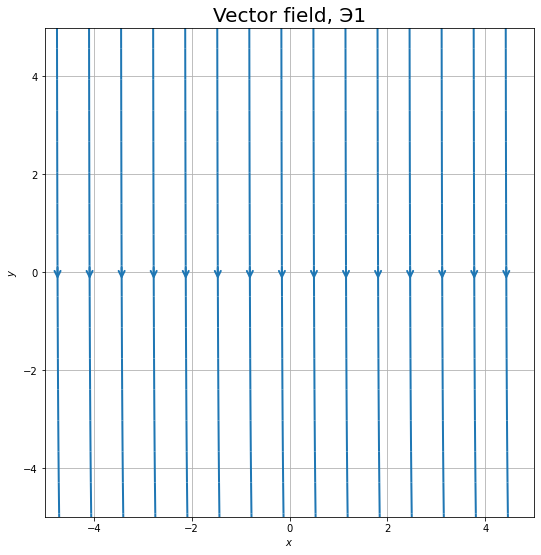

In [10]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

x_shape = grid_x.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = Э1[0].subs([(y, i), (x, j)])
        V[i,j] = Э1[1].subs([(y, i), (x, j)])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#q = ax.quiver(grid_x, grid_y, U, V, units='xy' ,scale=2, color='black')
q = ax.streamplot(grid_x, grid_y, U, V, linewidth=2, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1.5)

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Vector field, Э1',fontsize=20)
plt.grid()
plt.show()

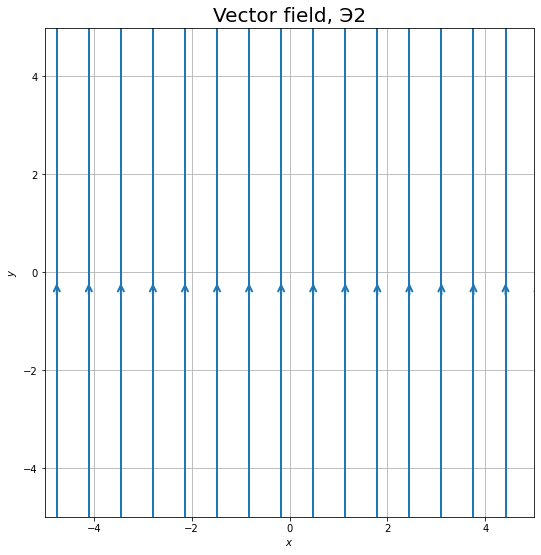

In [11]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

x_shape = grid_x.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = Э2[0].subs([(y, i), (x, j)])
        V[i,j] = Э2[1].subs([(y, i), (x, j)])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#q = ax.quiver(grid_x, grid_y, U, V, units='xy' ,scale=2, color='black')
q = ax.streamplot(grid_x, grid_y, U, V, linewidth=2, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1.5)

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Vector field, Э2',fontsize=20)
plt.grid()
plt.show()

4. Найти матрицы прямого и обратного преобразования координат

In [12]:
A = sp.Matrix([э1, э2])
print('Матрица прямого преобразования:')
display(A)

Матрица прямого преобразования:


⎡ 1    0⎤
⎢       ⎥
⎢   2   ⎥
⎣3⋅Y   1⎦

In [13]:
B = sp.Matrix([Э1, Э2]).T
print('Матрица обратного преобразования:')
display(B)

Матрица обратного преобразования:


⎡  1    0⎤
⎢        ⎥
⎢    2   ⎥
⎣-3⋅y   1⎦

Проверка правильности найденных матриц:

In [14]:
print('Единичная матрица:')
display(A*B.subs(y, Y))

Единичная матрица:


⎡1  0⎤
⎢    ⎥
⎣0  1⎦

5. Найти матрицы метрического тензора $\| g_{ij} \|$ и $\| g^{ij} \|$<br>
- Ковариантные компоненты:<br>
$$g_{ij} = э_iэ_j$$
тогда

$$\| g_{ij} \| = 
 \begin{bmatrix}
  э_1э_1 & э_1э_2 \\
 э_2э_1 & э_2э_2 \\
 \end{bmatrix}$$

In [15]:
g = sp.Matrix([[np.array(э1)@np.array(э1), np.array(э1)@np.array(э2)], 
               [np.array(э2)@np.array(э1), np.array(э2)@np.array(э2)]])

print('Матрица метрического тензора:')
display(g)

Матрица метрического тензора:


⎡           2  ⎤
⎢ 1      3⋅Y   ⎥
⎢              ⎥
⎢   2     4    ⎥
⎣3⋅Y   9⋅Y  + 1⎦

- Контравариантные компоненты:<br>
$$g^{ij} = э^iэ^j$$
тогда

$$\| g^{ij} \| = 
 \begin{bmatrix}
  э^1э^1 & э^1э^2 \\
 э^2э^1 & э^2э^2 \\
 \end{bmatrix}$$

In [16]:
G = sp.Matrix([[np.array(Э1)@np.array(Э1), np.array(Э1)@np.array(Э2)], 
               [np.array(Э2)@np.array(Э1), np.array(Э2)@np.array(Э2)]])

print('Матрица метрического тензора:')
display(G)

Матрица метрического тензора:


⎡   4          2⎤
⎢9⋅y  + 1  -3⋅y ⎥
⎢               ⎥
⎢     2         ⎥
⎣ -3⋅y       1  ⎦

6. Найти ко- и контравариантные компоненты вектора скорости $\overrightarrow{\nu}$ в криволинейных координатах<br>
- Контравариантные компоненты вектора скорости:

In [17]:
v1 = v[vx]*B[0] + v[vy]*B[2]
v2 = v[vx]*B[1] + v[vy]*B[3]

display(v1, v2)

- Ковариантные компоненты вектора скорости:

In [18]:
V1 = sp.simplify(g[0]*v1 + g[1]*v2).subs([(x, X), (y, Y)])
V2 = sp.simplify(g[2]*v1 + g[3]*v2).subs([(x, X), (y, Y)])

display(V1, V2)

7. Построить вектор скорости $\overrightarrow{\nu}$ в каждом квадранте

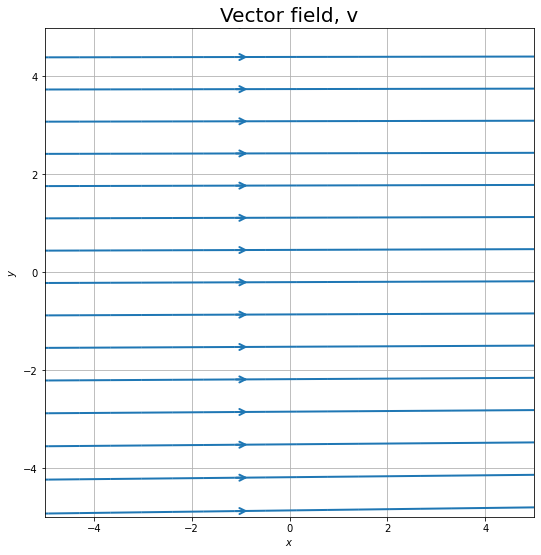

In [19]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

x_shape = grid_x.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = v[vx].subs([(y, i), (x, j)])
        V[i,j] = v[vy]

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#q = ax.quiver(grid_x, grid_y, U, V, units='xy' ,scale=2, color='black')
q = ax.streamplot(grid_x, grid_y, U, V, linewidth=2, cmap=plt.cm.inferno,
              density=1, arrowstyle='->', arrowsize=1.5)

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Vector field, v',fontsize=20)
plt.grid()
plt.show()

8. Найти символы Кристоффеля первого и второго рода $Г_{ki,j}$ и $Г^j_{ki}$<br>
- Символ Кристоффеля первого рода:
$$Г_{ki,j} = \frac{1}{2} \left[\frac{\partial g_{ji}}{\partial x^k} + \frac{\partial g_{kj}}{\partial x^i} - \frac{\partial g_{ik}}{\partial x^j}\right]$$

In [20]:
г = []
x_i = sp.Matrix([X, Y])

for j in range(2):
    for k in range(2):
        for i in range(2):
            г.append(1/2 * (sp.diff(g[j, i], x_i[k]) + sp.diff(g[k, j], x_i[i]) - sp.diff(g[i, k], x_i[j])))


print('г111, г121, г211, г221, г112, г122, г212, г222')
display(г)

г111, г121, г211, г221, г112, г122, г212, г222


- Символ Кристоффеля второго рода:
$$Г^j_{ki} = \frac{1}{2}g^{js} \left[\frac{\partial g_{is}}{\partial x^k} + \frac{\partial g_{ks}}{\partial x^i} - \frac{\partial g_{ki}}{\partial x^s}\right]$$

In [21]:
Г = []

for j in range(2):
    for k in range(2):
        for i in range(2):
            Г.append(sp.simplify((1/2 * G[j,0] * (sp.diff(g[i,0], x_i[k]) + sp.diff(g[k,0], x_i[i]) - sp.diff(g[k,i], x_i[0])) + \
                     1/2 * G[j,1] * (sp.diff(g[i,1], x_i[k]) + sp.diff(g[k,1], x_i[i]) - sp.diff(g[k,i], x_i[1]))).subs(y,Y)))


print('Г111, Г121, Г211, Г221, Г112, Г122, Г212, Г222')
display(Г)

Г111, Г121, Г211, Г221, Г112, Г122, Г212, Г222


9. Найти ко- и контравариантные компоненты вектора ускорения $\overrightarrow{w}$ в криволинейных координатах<br>
$$\overrightarrow{w} = w^iэ_i, w^i = \frac{\partial V^i}{\partial t} + V^j \nabla_j V^i$$
где
$$\nabla_j V^i = \frac{\partial V^i}{\partial x^j} + V^k Г^j_{ki}$$
- Контравариантные компоненты вектора ускорения:

In [22]:
w = []
v_nabla = []

v_nabla.append(sp.diff(v[vx], x_i[0]) + v[vx]*Г[0] + v[vy]*Г[1])    # 11
v_nabla.append(sp.diff(v[vx], x_i[1]) + v[vx]*Г[2] + v[vy]*Г[3])    # 12
v_nabla.append(sp.diff(v[vy], x_i[0]) + v[vx]*Г[4] + v[vy]*Г[5])    # 21
v_nabla.append(sp.diff(v[vy], x_i[1]) + v[vx]*Г[6] + v[vy]*Г[7])    # 22


w.append(sp.diff(v[vx], t) + v[vx]*v_nabla[0] + v[vy]*v_nabla[1])
w.append(sp.diff(v[vy], t) + v[vx]*v_nabla[2] + v[vy]*v_nabla[3])

display(w)

- Ковариантные компоненты вектора ускорения:

In [23]:
W1 = sp.simplify(g[0]*w[0] + g[1]*w[1]).subs([(x, X), (y, Y)])
W2 = sp.simplify(g[2]*w[0] + g[3]*w[1]).subs([(x, X), (y, Y)])

W = [W1, W2]

display(W)

10. Найти дивергенцию и ротор вектора скорости $\overrightarrow{\nu}$<br>
- Дивергенция скорости:
$$div V = \nabla_1 V^1 + \nabla_2 V^2$$

In [24]:
div = v_nabla[0] + v_nabla[3]
display(div)

- Ротор скорости:
$$rot V = \varepsilon^{ijk} \Omega_{ji} э_k$$
где

$$\Omega_{ji} = \frac{1}{2} \left(\nabla_j V_i - \nabla_i V_j \right), \nabla_i V_j = \frac{\partial V_j}{\partial x^i} - V_k Г^k_{ij}$$

Вычислим ковариантные производные от ковариантых компонент градиента скаляра:
$$\nabla_i V_j = \frac{\partial V_j}{\partial x^i} - V_k Г^k_{ij}$$

In [25]:
V_nabla = []

V_nabla.append(sp.diff(V1, x_i[1]) - (V1*Г[2] + V2*Г[6]))
V_nabla.append(sp.diff(V2, x_i[0]) - (V1*Г[1] + V2*Г[5]))

display(V_nabla)

Альтернированный тензор $(\nabla V)^*$:
$$\Omega_{ji} = \frac{1}{2} \left(\nabla_j V_i - \nabla_i V_j \right)$$

In [26]:
omega_12 = 1/2 * (V_nabla[0] - V_nabla[1])
omega_21 = -omega_12
omega = [omega_12, omega_21]

display(omega)

тогда ротор скорости равняется:
$$rot V = \varepsilon^{ij3} \Omega_{ji} э_3 = \varepsilon^{123} \Omega_{21} э_3 + \varepsilon^{213} \Omega_{12} э_3 = \Omega_{21} э_3 - \Omega_{12} э_3 = 2 \Omega_{21} э_3$$

In [27]:
rot = 2*omega_21
display(rot)

11. Получить явные формулы для вычисления градиента и лапласиана скалярной функции $\varphi=\varphi(x^1,x^2)$ в заданных криволинейных координатах<br>
Лапласиан скалярной функции:
$$\Delta \varphi = \nabla^i \nabla_i \varphi$$
Градиент скалярной функции:
$$\nabla_i \varphi = \frac{\partial \varphi}{\partial x^i}э^i = \frac{\partial \varphi}{\partial x^1}э^1 + \frac{\partial \varphi}{\partial x^2}э^2$$
где ковариантные компоненты градиента скаляра:
$$\nabla_1 \varphi = \frac{\partial \varphi}{\partial x^1}э^1, \nabla_2 \varphi = \frac{\partial \varphi}{\partial x^2}э^2$$

In [28]:
phi = sp.Function('varphi')

grad_phi = phi(X, Y).diff(X) + phi(X, Y).diff(Y)
display(grad_phi)

Вычислим ковариантные производные от ковариантых компонент градиента скаляра:
$$\nabla_i \nabla_j \varphi = \frac{\partial}{\partial x^i} \frac{\partial \varphi}{\partial x^j} - \frac{\partial \varphi}{\partial x^k} Г^k_{ij}$$

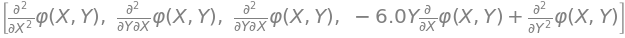

In [29]:
nabla2_phi = []

nabla2_phi.append(phi(X,Y).diff(X, 2) - (phi(X,Y).diff(X)*Г[0] + phi(X,Y).diff(Y)*Г[4]))    # 11
nabla2_phi.append(phi(X,Y).diff(Y, X) - (phi(X,Y).diff(X)*Г[2] + phi(X,Y).diff(Y)*Г[6]))    # 21
nabla2_phi.append(phi(X,Y).diff(X, Y) - (phi(X,Y).diff(X)*Г[1] + phi(X,Y).diff(Y)*Г[5]))    # 12
nabla2_phi.append(phi(X,Y).diff(Y, 2) - (phi(X,Y).diff(X)*Г[3] + phi(X,Y).diff(Y)*Г[7]))    # 22

display(nabla2_phi)

тогда
$$\nabla^1 \nabla_1 \varphi = g^{i1} \nabla_i \nabla_1 \varphi = g^{11} \nabla_1 \nabla_1 \varphi + g^{21} \nabla_2 \nabla_1 \varphi$$
$$\nabla^2 \nabla_2 \varphi = g^{i2} \nabla_i \nabla_2 \varphi = g^{12} \nabla_1 \nabla_2 \varphi + g^{22} \nabla_2 \nabla_2 \varphi$$

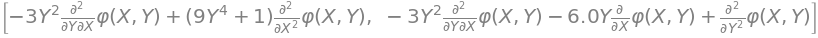

In [30]:
nabla_phi = []

nabla_phi.append((G[0, 0]*nabla2_phi[0] + G[1, 0]*nabla2_phi[1]).subs([(x, X), (y, Y)]))    # 11
nabla_phi.append((G[0, 1]*nabla2_phi[2] + G[1, 1]*nabla2_phi[3]).subs([(x, X), (y, Y)]))    # 22
                 
display(nabla_phi)

Лапласиан скалярной функции:
$$\Delta \varphi = \nabla^i \nabla_i \varphi = \nabla^1 \nabla_1 \varphi + \nabla^2 \nabla_2 \varphi$$

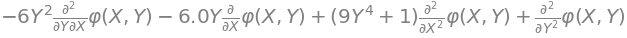

In [31]:
delta_phi = sp.simplify(nabla_phi[0] + nabla_phi[1])
display(delta_phi)

12. Получить явные формулы для вычисления градиента $\nabla \overrightarrow{\nu}$ и лапласиана вектора скорости $\Delta \overrightarrow{\nu}$ в заданных криволинейных координатах<br>
- Градиент вектора скорости:
$$\nabla \overrightarrow{\nu} = \nabla_i \nu^j э^i э_j = \nabla_i \nu_j э^i э^j$$

In [32]:
nabla_v = v_nabla[0] + v_nabla[1] + v_nabla[2] + v_nabla[3]
display(nabla_v)

- Лапласиан вектора скорости:
$$\Delta \overrightarrow{\nu} = \nabla^i \nabla_i \nu^k э_k = \nabla_i \nabla^i \nu^k э_k$$

In [33]:
nabla2_v = []

nabla2_v.append(v1.diff(X, 2) - (v1.diff(X)*Г[0] + v1.diff(Y)*Г[4]))    # 11
nabla2_v.append(v1.diff(Y, 2) - (v1.diff(X)*Г[3] + v1.diff(Y)*Г[7]))    # 21
nabla2_v.append(v2.diff(X, 2) - (v2.diff(X)*Г[0] + v2.diff(Y)*Г[4]))    # 12
nabla2_v.append(v2.diff(Y, 2) - (v2.diff(X)*Г[3] + v2.diff(Y)*Г[7]))    # 22

delta_v = sp.simplify((G[0, 0]*nabla2_v[0] + G[1, 0]*nabla2_v[1]).subs([(x, X), (y, Y)]) + 
                      (G[0, 1]*nabla2_v[2] + G[1, 1]*nabla2_v[3]).subs([(x, X), (y, Y)]))

display(delta_v)